In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

![Bayes theorem](assets/bayes_theorem.png)

In [ ]:
# TODO: Add proof?

In [14]:
# Prior: probability of some hypothetical drug use case testing scenario
prior_user = 0.10
prior_non_user = 1 - prior_user

# Likelihoods
likelihood_pos_given_user = 0.90      #  P(+ | User)
likelihood_pos_given_non_user = 0.10  #  P(+ | NOT User)

# Evidence: P(+) = ways to test positive
# TODO: Law of a total probability?
evidence = (likelihood_pos_given_user * prior_user) + (likelihood_pos_given_non_user * prior_non_user)

# Posterior: P(User | +)
posterior = (likelihood_pos_given_user * prior_user) / evidence

print(f"Prior P(User): {prior_user}")
print(f"Evidence P(+): {evidence}")
print(f"Posterior P(User | +): {posterior:.4f}")

Prior P(User): 0.1
Evidence P(+): 0.18000000000000002
Posterior P(User | +): 0.5000


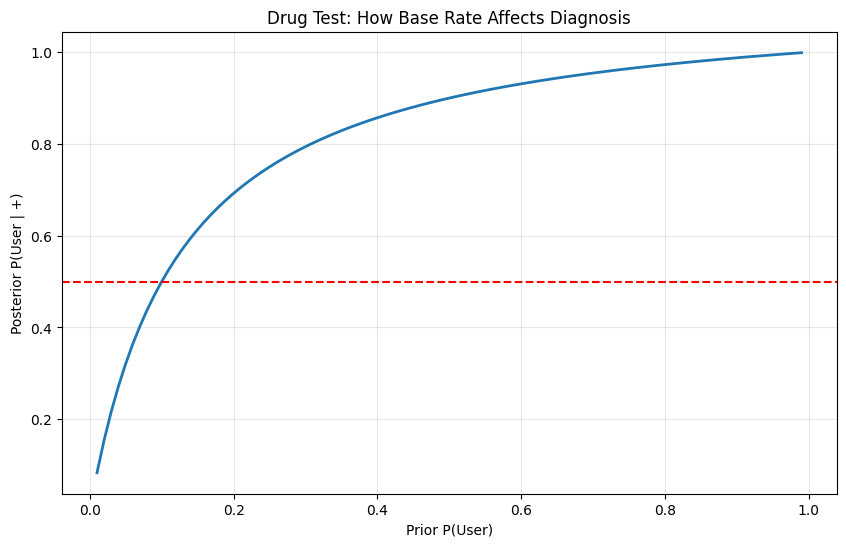

In [15]:
prior_range = np.linspace(0.01, 0.99, 100) 

posteriors = []
likelihood_pos_given_user = 0.90
likelihood_pos_given_non_user = 0.10

for prior_user in prior_range:
    # Same as in previous cell, but now in a loop for a plot
    prior_non_user = 1 - prior_user
    evidence = (likelihood_pos_given_user * prior_user) + (likelihood_pos_given_non_user * prior_non_user)
    posterior = (likelihood_pos_given_user * prior_user) / evidence
    posteriors.append(posterior)

plt.figure(figsize=(10, 6))
plt.plot(prior_range, posteriors, linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', label='1/2')
plt.xlabel('Prior P(User)')
plt.ylabel('Posterior P(User | +)')
plt.title('Drug Test: How Base Rate Affects Diagnosis')
plt.grid(True, alpha=0.3)
plt.show()

# Conclusion
Given there is a higher drug use among tested population, we can conclude with a higher probability that if a test was + person was in fact a user. If the drug is not as popular (some unpopular medicine, as we tested prior_non_user = 0.1), and someone came up with a test to detect such drug in a blood of a person, we would get 1/2 true positives and 1/2 false positive. Basically a coin toss.